In [ ]:
preds_top = np.load('preds_top.npy')
preds_top = [i[0][0][0] for i in preds_top]
print ('Type',type(preds_top),'Shape',len(preds_top))

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import pickle

In [68]:
with open('./LUNA_model_v2/dict_top_voxels_predict.pickle', 'rb') as handle:
    plotting = pickle.load(handle)
patient = list(plotting.keys())[0]
patch = np.squeeze(plotting[patient]['top_voxels'])*1400.-1000.
IX = plotting[patient]['top_ixs']
print (patient)
print (list(plotting[patient].keys()))

07bca4290a2530091ce1d5f200d9d526
['max_malig', 1, 'top_voxels', 'preds', 'top_ixs']


In [5]:
predictions = [x[0] for x in plotting[patient][1]]
print ('Length of predictions..',len(predictions))
malignancy = plotting[patient]['max_malig']
print ('Maximum malignancy of original patch..',malignancy)

Length of predictions.. 262144
Maximum malignancy of original patch.. 0.534115552902


Differences between predicted and original voxel range from -2.3365020752e-05 to 0.0401204228401


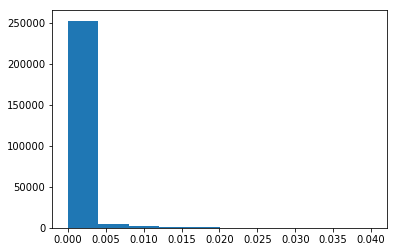

In [6]:
predictions_difference = [malignancy-p for p in predictions]
print ('Differences between predicted and original voxel range from', min(predictions_difference),'to',max(predictions_difference))
plt.hist(predictions_difference)
plt.show()

In [12]:
TopPixels = sum(i > .010 for i in predictions_difference)
print ('Percent of pixels in voxel making an impact', TopPixels/len(predictions_difference))
print ('Number of pixels in voxel making an impact', TopPixels)

Percent of pixels in voxel making an impact 0.0143775939941
Number of pixels in voxel making an impact 3769


In [14]:
impactful_pixel_ixs = np.argsort(predictions_difference,axis=0)[-TopPixels:]
impactful_pixel_ixs.shape

(3769,)

In [184]:
np.argsort(predictions_difference,axis=0)[-1:]

array([186802])

In [167]:
def plot_3d(image, threshold=0.9):
    
    from mpl_toolkits.mplot3d.art3d import Poly3DCollection
    from skimage import measure
    
    verts, faces,_,_ = measure.marching_cubes(image, threshold)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    mesh = Poly3DCollection(verts[faces], alpha=0.70)
    face_color = [0.45, 0.45, 0.75]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)

    ax.set_xlim(0, image.shape[0])
    ax.set_ylim(0, image.shape[1])
    ax.set_zlim(0, image.shape[2])

    plt.show()

In [26]:
def load_raw(path):
    import dicom as dicom
    slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
    return np.stack([s.pixel_array for s in slices],axis=2).astype(np.int16)

In [27]:
path_raw = '/home/gantos/data/stage1/'
patient_raw = load_raw(path_raw+patient)
patient_raw.shape

(512, 512, 132)

In [15]:
patient_full = np.load('../data/stage1_arrays/'+patient+'.npy')

In [20]:
patient_full.shape

(351, 351, 330)

In [102]:
a = np.arange(27).reshape(3,3,3)
print (a,'\n',a[0],'\n',a[0][0])
z=0
y=0
x=0
xyzmax = 3
goal = set([16,17])
for s in a:
    for r in s:
        rlist = list(r)
        print ('Rlist',rlist)
        if goal <= set(rlist):
            x = rlist.index(list(goal)[0])
            print ('Found!',x,y%xyzmax,z%xyzmax)
        y+=1
    z+=1

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]] 
 [[0 1 2]
 [3 4 5]
 [6 7 8]] 
 [0 1 2]
Rlist [0, 1, 2]
Rlist [3, 4, 5]
Rlist [6, 7, 8]
Rlist [9, 10, 11]
Rlist [12, 13, 14]
Rlist [15, 16, 17]
Found! 1 2 1
Rlist [18, 19, 20]
Rlist [21, 22, 23]
Rlist [24, 25, 26]


In [143]:
patch[0][0][0:5]

array([-906., -897., -877., -861., -861.], dtype=float32)

In [120]:
patch[0][0:5,0:5]

array([[-906., -897., -877., -861., -861.],
       [-887., -896., -891., -882., -876.],
       [-864., -866., -873., -879., -875.],
       [-856., -855., -868., -875., -860.],
       [-869., -880., -897., -902., -877.]], dtype=float32)

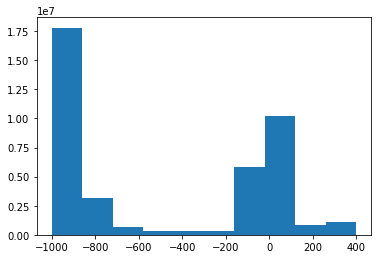

In [130]:
plt.hist(patient_full.flatten())
plt.show()

In [151]:

goal = list(patch[0][0])
for z in range(patient_full.shape[2]):
    s = np.transpose(patient_full,(2,1,0))[z]
    print ('Z',z,s.shape)
    for y in range(patient_full.shape[1]):
        row = s[y]
        rlist= list(row)
        if set(goal) <= set(rlist):
            x = rlist.index(goal[0])
            print ('Found!',x,y,z)


Z 0 (351, 351)
Z 1 (351, 351)
Z 2 (351, 351)
Z 3 (351, 351)
Z 4 (351, 351)
Z 5 (351, 351)
Z 6 (351, 351)
Z 7 (351, 351)
Z 8 (351, 351)
Z 9 (351, 351)
Z 10 (351, 351)
Z 11 (351, 351)
Z 12 (351, 351)
Z 13 (351, 351)
Z 14 (351, 351)
Z 15 (351, 351)
Z 16 (351, 351)
Z 17 (351, 351)
Z 18 (351, 351)
Z 19 (351, 351)
Z 20 (351, 351)
Z 21 (351, 351)
Z 22 (351, 351)
Z 23 (351, 351)
Z 24 (351, 351)
Z 25 (351, 351)
Z 26 (351, 351)
Z 27 (351, 351)
Z 28 (351, 351)
Z 29 (351, 351)
Z 30 (351, 351)
Z 31 (351, 351)
Z 32 (351, 351)
Z 33 (351, 351)
Z 34 (351, 351)
Z 35 (351, 351)
Z 36 (351, 351)
Z 37 (351, 351)
Z 38 (351, 351)
Z 39 (351, 351)
Z 40 (351, 351)
Z 41 (351, 351)
Z 42 (351, 351)
Z 43 (351, 351)
Z 44 (351, 351)
Z 45 (351, 351)
Z 46 (351, 351)
Z 47 (351, 351)
Z 48 (351, 351)
Z 49 (351, 351)
Z 50 (351, 351)
Z 51 (351, 351)
Z 52 (351, 351)
Z 53 (351, 351)
Z 54 (351, 351)
Z 55 (351, 351)
Z 56 (351, 351)
Z 57 (351, 351)
Z 58 (351, 351)
Z 59 (351, 351)
Z 60 (351, 351)
Z 61 (351, 351)
Z 62 (351, 351)
Z 

In [193]:
max_impact = max(predictions_difference)
count = 0
patch_nodule = np.zeros(patch.shape)
for e in np.nditer(patch_nodule, op_flags=['readwrite']):
    if count in impactful_pixel_ixs:
        e[...] = 1*(predictions_difference[count]/max_impact)
        count += 1
    else:
        count += 1
        continue
print ('Done')

Done


In [173]:
np.sum(patch_nodule)

3769.0

In [194]:
np.sum(patch_nodule)

1482.978550279375

In [ ]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(np.transpose(patch_nodule[:,:,50], (1,0)), cmap=plt.cm.gray)
plt.axis('off')
plt.savefig('./figs/LUNA_patch_slice.png', transparent=True, bbox_inches='tight')

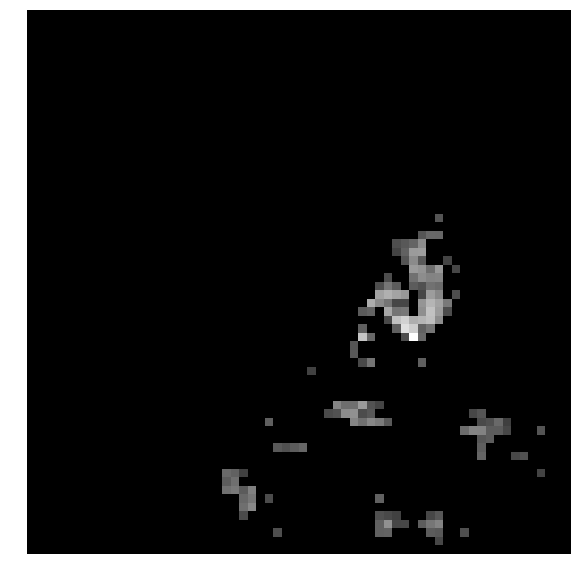

In [196]:
plt.show()